#### 一个demo演示如何通过function.py写的API函数接口 实现 “边界渔网化+合并点源 与 渔网（面源）

1. 利用数据文件：1.geojson的矢量边界 和 API 中的 create_fishnet 方法,实现 边界渔网化
2. 利用数据文件：1.csv的dataframe,转换geodataframe 为 待合并的点源数据
3. 利用 API 中的 Point_Merge_Fishnet 方法，实现 合并点源 与 渔网（面源） 得到全新的渔网

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely import Point
import matplotlib.pyplot as plt

- 步骤一：利用数据文件1.geojson的矢量边界 和 API 中的 create_fishnet 方法,实现 边界渔网化

In [ ]:
from function import create_fishnet
profile_data = gpd.read_file('1.json')
fishnet_old=create_fishnet(profile_data,0.01)

Skipping field center: unsupported OGR type: 3
Skipping field centroid: unsupported OGR type: 3
Skipping field acroutes: unsupported OGR type: 1


- 步骤二：利用数据文件1.csv的dataframe,转换geodataframe 为 待合并的点源数据

In [3]:
#注意geomerty都是经度在前，纬度在后！！！！！
point_data=pd.read_csv('1.csv')
point_data['geometry']=[Point(x,y) for x,y in zip(point_data['lat'],point_data['lon'])]
# 转换为 GeoDataFrame 并设置初始 CRS
point_data = gpd.GeoDataFrame(point_data,crs="EPSG:4326")

- 步骤三： 利用 API 中的 Point_Merge_Fishnet 方法，实现 合并点源 与 渔网（面源） 得到 全新的渔网

In [6]:
from function import Point_Merge_Fishnet
new_fishnet=Point_Merge_Fishnet(point_data,fishnet_old,'value')

> 绘图可视化一下：

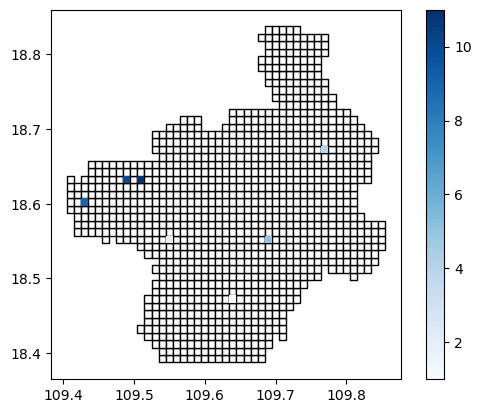

In [7]:
fig,ax=plt.subplots()
new_fishnet.plot(ax=ax, color='white', edgecolor='black')
new_fishnet.plot(column='value', cmap='Blues',legend=True,ax=ax)
plt.show()

In [8]:
new_fishnet[new_fishnet['value']>0]

,index_right,number,start_lon,end_lon,start_lat,end_lat,geometry,count,value
111.0,111,66,109.424823,109.434823,18.597512,18.607512,"POLYGON ((109.43482 18.59751, 109.43482 18.607...",1.0,9.0
384.0,384,225,109.484823,109.494823,18.627512,18.637512,"POLYGON ((109.49482 18.62751, 109.49482 18.637...",1.0,10.0
474.0,474,275,109.504823,109.514823,18.627512,18.637512,"POLYGON ((109.51482 18.62751, 109.51482 18.637...",1.0,11.0
646.0,646,255,109.544823,109.554823,18.547512,18.557512,"POLYGON ((109.55482 18.54751, 109.55482 18.557...",1.0,2.0
1043.0,1043,216,109.634823,109.644823,18.467512,18.477512,"POLYGON ((109.64482 18.46751, 109.64482 18.477...",1.0,1.0
1276.0,1276,493,109.684823,109.694823,18.547512,18.557512,"POLYGON ((109.69482 18.54751, 109.69482 18.557...",1.0,5.0
1648.0,1648,1073,109.764823,109.774823,18.667512,18.677512,"POLYGON ((109.77482 18.66751, 109.77482 18.677...",1.0,4.0
